# Assignment - Imbalanced Data

Using the dataset for the risk of heart attack with class imbalance:

1. Create a logistic regression model and measure the performance of it.
2. By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
risk_of_heart_attack = pd.read_csv("risk_of_heart_attack.csv")
df = risk_of_heart_attack.copy()

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.5+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [5]:
df[df['ca'] == '<null>']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
85,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,<null>,3.0,negative
142,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,<null>,7.0,negative
146,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,<null>,3.0,negative


In [6]:
stats.mode(df['ca'])[0]

array(['0.0'], dtype=object)

In [7]:
df['ca'].replace(to_replace='<null>', value=0.0, inplace=True)

In [8]:
len(df[df['ca'] == '<null>'])

0

In [9]:
df[df['thal'] == '<null>']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
44,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,<null>,negative


In [10]:
stats.mode(df['thal'])[0]

array(['3.0'], dtype=object)

In [11]:
df['thal'].replace(to_replace='<null>', value=3.0, inplace=True)

In [12]:
len(df[df['thal'] == '<null>'])

0

In [13]:
df["ca"] = df["ca"].astype(float)
df["thal"] = df["thal"].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    float64
 12  thal      177 non-null    float64
 13  num       177 non-null    object 
dtypes: float64(13), object(1)
memory usage: 19.5+ KB


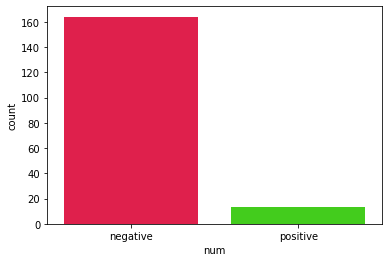

In [15]:
sns.countplot(df["num"], palette='prism_r');

In [16]:
num_categories = ["negative","positive"]
df['num'].replace(to_replace=num_categories, value=[0, 1], inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [17]:
print("Negative instances : %{:.2f}".format((len(df['num'])-sum(df['num']))/len(df['num'])*100))
print("Positive instances : %{:.2f}".format(sum(df['num'])/len(df['num'])*100))

Negative instances : %92.66
Positive instances : %7.34


Only 7.34% of the data points is classified as positive. Therefore, it can easily be said that the dataset is not balanced.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    accuracy = logreg_model.score(X_test, y_test)
    print("Accuracy : {:.3f}\n".format(accuracy))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return None

In [20]:
X = df.drop('num', axis=1)
y = df['num']

create_model(X,y)

Accuracy : 0.917

Train Dataset
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       131
           1       0.89      0.80      0.84        10

    accuracy                           0.98       141
   macro avg       0.94      0.90      0.92       141
weighted avg       0.98      0.98      0.98       141

Test Dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.50      0.33      0.40         3

    accuracy                           0.92        36
   macro avg       0.72      0.65      0.68        36
weighted avg       0.90      0.92      0.91        36



Our model is not successful in predicting positive values which are labeled with '1'.

### 1) Up-Sampling

In [21]:
from sklearn.utils import resample

negative = df[df['num'] == 0]
positive = df[df['num'] == 1]

heart_disease_upsampled = resample(positive, replace = True,
                                    n_samples = len(negative),
                                    random_state = 111)

upsampled_df = pd.concat([negative, heart_disease_upsampled])
upsampled_df['num'].value_counts()

1    164
0    164
Name: num, dtype: int64

In [22]:
X = upsampled_df.drop('num', axis=1)
y = upsampled_df['num']

create_model(X,y)

Accuracy : 0.970

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



When we resample the data, there is a increase in metrics.

### 2) Down-Sampling

In [23]:
heart_disease_downsampled = resample(negative, replace = True,
                                    n_samples = len(positive),
                                    random_state = 111)

downsampled_df = pd.concat([positive, heart_disease_downsampled])
downsampled_df['num'].value_counts()

1    13
0    13
Name: num, dtype: int64

In [24]:
X = downsampled_df.drop('num', axis=1)
y = downsampled_df['num']

create_model(X,y)

Accuracy : 1.000

Train Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



When we reduced sample size, we had good results compared to normal dataset. 

### 3) SMOTE

In [25]:
from imblearn.over_sampling import SMOTE

X = df.drop('num', axis=1)
y = df['num']

sm = SMOTE(random_state=27)
X_smote, y_smote = sm.fit_resample(X, y)
create_model(X_smote, y_smote)

Accuracy : 0.970

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       131
           1       0.96      1.00      0.98       131

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



### 4) ADASYN

In [26]:
from imblearn.over_sampling import ADASYN

X = df.drop('num', axis=1)
y = df['num']

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_resample(X, y)

create_model(X_adasyn, y_adasyn)

Accuracy : 0.955

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       132

    accuracy                           0.97       263
   macro avg       0.97      0.97      0.97       263
weighted avg       0.97      0.97      0.97       263

Test Dataset
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.94      0.97      0.96        33

    accuracy                           0.95        66
   macro avg       0.95      0.95      0.95        66
weighted avg       0.95      0.95      0.95        66



Overall all of our methods had good results. We had the best results with down-sampling but with the sample size being this small we probably lost some information valuable to a model. With that conclusion, it will probably be more convenient to use other models.